## Figure 9

Similar to [Figure 2](https://github.com/EdwardJKim/astroclass/blob/master/paper/notebooks/figure02/som_colors.ipynb)
but for the reduced training data set.

In [1]:
%matplotlib inline

In [2]:
from __future__ import print_function, division, unicode_literals
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

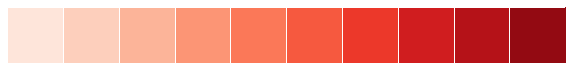

In [4]:
cmap1 = sns.choose_colorbrewer_palette('sequential', as_cmap=True)

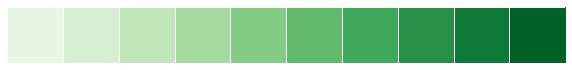

In [5]:
cmap2 = sns.choose_colorbrewer_palette('sequential', as_cmap=True)

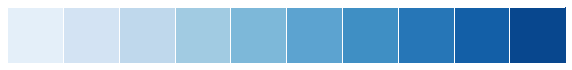

In [6]:
cmap3 = sns.choose_colorbrewer_palette('sequential', as_cmap=True)

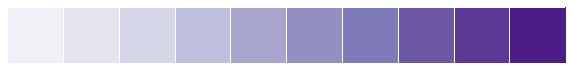

In [7]:
cmap4 = sns.choose_colorbrewer_palette('sequential', as_cmap=True)

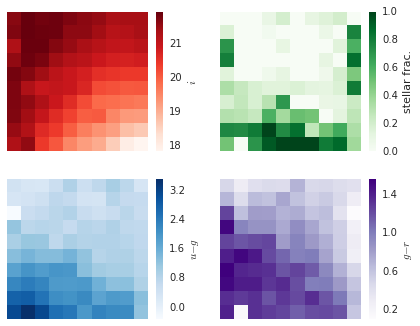

In [8]:
from matplotlib import gridspec

truth_train = np.loadtxt('../../data/truth_w1.dat')
mag_i_train = np.loadtxt('../../data/mag_i_w1.dat')
clr_u_g_train = np.loadtxt('../../data/clr_u_g_w1.dat')
clr_g_r_train = np.loadtxt('../../data/clr_g_r_w1.dat')

n_grid = 10
clens_som_cell = np.loadtxt('../../data/som_cells_cv_w1.dat')

# calculate mean values for each cell
def calc_cell_mean(x, som_cells, n_grid=10):
    x_cells = np.zeros(n_grid**2)
    for i in xrange(n_grid**2):
        i_cell = np.where(som_cells == i)
        x_cells[i] = x[i_cell].mean()
    
    return x_cells.reshape((n_grid, n_grid))

mag_i_cells = calc_cell_mean(mag_i_train, clens_som_cell)
clr_u_g_cells = calc_cell_mean(clr_u_g_train, clens_som_cell)
clr_g_r_cells = calc_cell_mean(clr_g_r_train, clens_som_cell)
star_frac_cells = calc_cell_mean(truth_train, clens_som_cell)

gs = gridspec.GridSpec(2, 3, height_ratios = (1, 1), width_ratios = (9, 9, 1))

ax1 = plt.subplot(gs[0, 0])
im1 = ax1.matshow(mag_i_cells, cmap=cmap1)
ax1.set_xticks([])
ax1.set_yticks([])
cb1 = plt.colorbar(im1)
cb1.set_ticks([18, 19, 20, 21, 22])
cb1.set_label(r'$i$')

ax2 = plt.subplot(gs[0, 1])
im2 = ax2.matshow(star_frac_cells, cmap=cmap2)
ax2.set_xticks([])
ax2.set_yticks([])
cb2 = plt.colorbar(im2)
cb2.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1])
cb2.set_label('stellar frac.')

ax3 = plt.subplot(gs[1, 0])
im3 = ax3.matshow(clr_u_g_cells, cmap=cmap3)
ax3.set_xticks([])
ax3.set_yticks([])
cb3 = plt.colorbar(im3)
cb3.set_ticks([0, 0.8, 1.6, 2.4, 3.2])
cb3.set_label(r'$u-g$')

ax4 = plt.subplot(gs[1, 1])
im4 = ax4.matshow(clr_g_r_cells, cmap=cmap4)
ax4.set_xticks([])
ax4.set_yticks([])
cb4 = plt.colorbar(im4)
cb4.set_label(r'$g-r$')
cb4.set_ticks([0.2, 0.6, 1.0, 1.4])

plt.savefig('../../figures/som_colors_cut.pdf')

plt.show()